<a href="https://colab.research.google.com/github/FatiBuuloloo/predictive_maintenance-mini_project_000/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [ ]:
data=pd.read_csv("/content/predictive_maintenance(dataset1).csv")
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data =data.drop(columns=["UDI"])

In [ ]:
data.shape

(10000, 9)

In [ ]:
data.isna().sum()

,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
data.dtypes

,0
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64
Failure Type,object


In [ ]:
data.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
data.Target.unique()

array([0, 1])

In [ ]:
data["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
data["Power [Watt]"] = data["Rotational speed [rpm]"]*data["Torque [Nm]"] *(2*math.pi/60)
data['Mechanical_Stress_Index'] = data['Torque [Nm]'] * data['Tool wear [min]']
data['Wear_Heat_Index'] = data['Tool wear [min]'] * (data['Process temperature [K]'] - data['Air temperature [K]'])
data['Load_Ratio'] = data['Torque [Nm]'] / (data['Rotational speed [rpm]'] + 1)

In [ ]:
le_failure = LabelEncoder()
le_type = LabelEncoder()
data['Label Failure']= le_failure.fit_transform(data["Failure Type"])
data['Label Type']= le_type.fit_transform(data["Type"])

In [ ]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power [Watt],Mechanical_Stress_Index,Wear_Heat_Index,Load_Ratio,Label Failure,Label Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,6951.590560,0.0,0.0,0.027577,1,2
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,6826.722724,138.9,31.5,0.032860,1,1
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,7749.387543,247.0,52.0,0.032955,1,1
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,5927.504659,276.5,72.8,0.027545,1,1
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,5897.816608,360.0,94.5,0.028389,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,4955.129373,413.0,134.4,0.018380,1,2
9996,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,5434.703963,540.6,161.5,0.019473,1,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,5753.617506,734.8,211.2,0.020292,1,2
9998,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,7151.102638,1212.5,242.5,0.034422,1,0


In [ ]:
print(le_failure.classes_)

['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']


In [ ]:
"""
'Heat Dissipation Failure' =0
'No Failure' = 1
'Overstrain Failure' = 2
'Power Failure' =3
'Random Failures' = 4
'Tool Wear Failure' = 5

"""

"\n'Heat Dissipation Failure' =0\n'No Failure' = 1\n'Overstrain Failure' = 2\n'Power Failure' =3\n'Random Failures' = 4\n'Tool Wear Failure' = 5\n\n"

In [ ]:

for item in le_failure.classes_:
    total_data = data[data["Failure Type"] == item].shape[0]
    print(f"{item} have {total_data} total dataset")

Heat Dissipation Failure have 112 total dataset
No Failure have 9652 total dataset
Overstrain Failure have 78 total dataset
Power Failure have 95 total dataset
Random Failures have 18 total dataset
Tool Wear Failure have 45 total dataset


In [ ]:
print(le_type.classes_)

['H' 'L' 'M']


In [ ]:
df_X =data.drop(columns=["Type", "Product ID","Target", "Failure Type", "Label Failure"])

In [ ]:
df_X.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power [Watt],Mechanical_Stress_Index,Wear_Heat_Index,Load_Ratio,Label Type
0,298.1,308.6,1551,42.8,0,6951.590560,0.0,0.0,0.027577,2
1,298.2,308.7,1408,46.3,3,6826.722724,138.9,31.5,0.032860,1
2,298.1,308.5,1498,49.4,5,7749.387543,247.0,52.0,0.032955,1
3,298.2,308.6,1433,39.5,7,5927.504659,276.5,72.8,0.027545,1
4,298.2,308.7,1408,40.0,9,5897.816608,360.0,94.5,0.028389,1


In [ ]:
df_y = data["Label Failure"]

In [ ]:
df_y.head(5)

,Label Failure
0,1
1,1
2,1
3,1
4,1


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df_X,df_y, stratify=df_y, random_state=24, test_size=0.2)

In [ ]:
smote =SMOTE(
sampling_strategy ='auto',
random_state=24,
k_neighbors=5
)

In [ ]:
trainX_ , trainy_ =smote.fit_resample(train_X, train_y)

In [ ]:
model_svm = svm.SVC(kernel="rbf")
model_rf = RandomForestClassifier(n_estimators=100, random_state=24)
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
models = {
    "SVM": model_svm,
    "Random Forest": model_rf,
    "KNN": model_knn
}

In [ ]:
predicted_label ={}

In [ ]:
for name, model in models.items():
    model.fit(trainX_, trainy_)
    predicted_label[name] = model.predict(test_X)
    print(f"{name} Accuracy: {accuracy_score(test_y, predicted_label[name]):.4f}")

SVM Accuracy: 0.6030
Naive Bayes Accuracy: 0.1215
Random Forest Accuracy: 0.9590
KNN Accuracy: 0.7610


In [ ]:

print("Random Forest")
print(classification_report(test_y, predicted_label["Random Forest"]))

Random Forest
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.99      0.97      0.98      1930
           2       0.93      0.88      0.90        16
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         4
           5       0.15      0.56      0.23         9

    accuracy                           0.96      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:

print("KNN")
print(classification_report(test_y, predicted_label["KNN"]))

KNN
              precision    recall  f1-score   support

           0       0.15      0.59      0.24        22
           1       0.99      0.76      0.86      1930
           2       0.68      0.94      0.79        16
           3       0.59      1.00      0.75        19
           4       0.00      0.00      0.00         4
           5       0.06      0.44      0.10         9

    accuracy                           0.76      2000
   macro avg       0.41      0.62      0.46      2000
weighted avg       0.97      0.76      0.85      2000



In [ ]:
print(le_failure.inverse_transform(model_rf.classes_))

['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']


Text(120.7222222222222, 0.5, 'True Value')

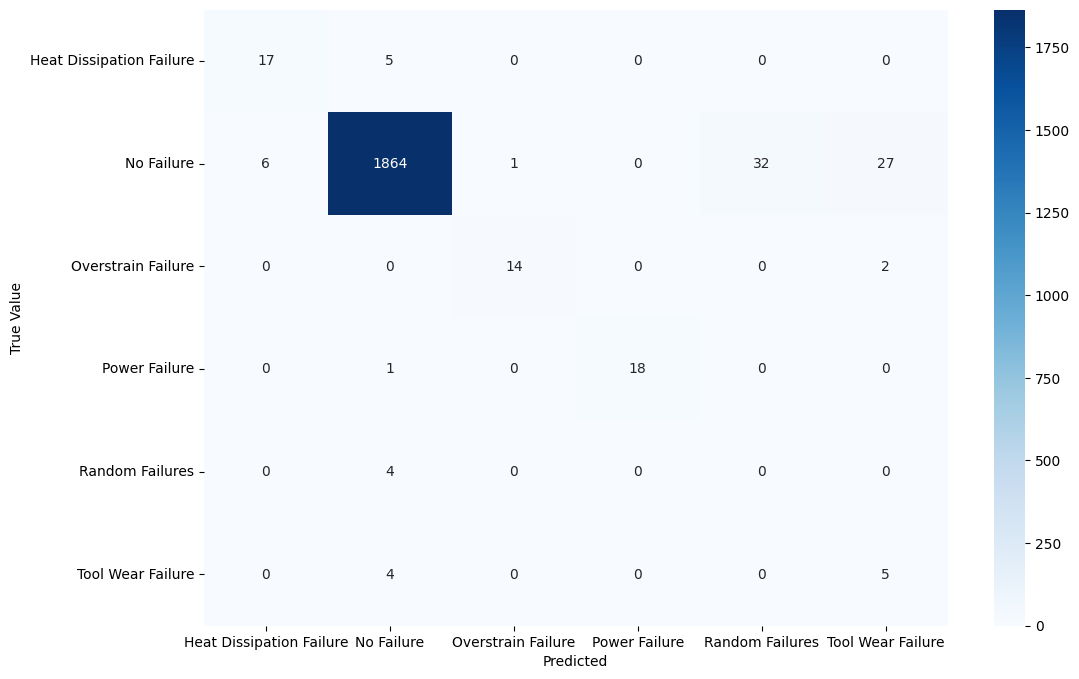

In [ ]:

cm_rf = confusion_matrix(test_y, predicted_label["Random Forest"])

plt.figure(figsize=(12,8))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
  xticklabels =le_failure.inverse_transform(model_rf.classes_),yticklabels = le_failure.inverse_transform(model_rf.classes_))

plt.xlabel('Predicted')

plt.ylabel('True Value')

In [ ]:
print("""
'Heat Dissipation Failure' =0
'No Failure' = 1
'Overstrain Failure' = 2
'Power Failure' =3
'Random Failures' = 4
'Tool Wear Failure' = 5
Overall, the Random Forest model show high performance in identifying 'Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', and 'Power Failure' categories, achieving precision and recall rates exceeding 79%.
However, the model facing significant challenges in detecting 'Random Failures' and 'Tool Wear Failure'. As we can see from the confusion matrix, that these specific failures are frequently misclassified as normal conditions ('No Failure'). The extremely low sample size (support) for these minority classes likely prevents the model from learning their distinct patterns effectively. While the model is highly effective at filtering out normal operating conditions""")


'Heat Dissipation Failure' =0
'No Failure' = 1
'Overstrain Failure' = 2
'Power Failure' =3
'Random Failures' = 4
'Tool Wear Failure' = 5
Overall, the Random Forest model show high performance in identifying 'Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', and 'Power Failure' categories, achieving precision and recall rates exceeding 79%.
However, the model facing significant challenges in detecting 'Random Failures' and 'Tool Wear Failure'. As we can see from the confusion matrix, that these specific failures are frequently misclassified as normal conditions ('No Failure'). The extremely low sample size (support) for these minority classes likely prevents the model from learning their distinct patterns effectively. While the model is highly effective at filtering out normal operating conditions


In [ ]:

selected_model = models["Random Forest"]
file_name = 'model_rf_project000.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(selected_model, file)

print(f"Model {file_name} succesfully saved!")

Model model_rf_project000.pkl succesfully saved!


In [ ]:
with open('model_rf_project000v3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
def run_prediction():
    input_data =[]
    with open('model_rf_project000v3.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    air_temp = float(input("Air Temperature [Kelvin]: "))
    process_temp = float(input("Process Temperature [Kelvin]: "))
    rot_speed = float(input("Rotational Speed [rpm]: "))
    torque = float(input("Torque [Nm]: "))
    tool_wear = float(input("Tool Using Time [Minute]: "))
    power = rot_speed * torque*(2*math.pi/60)
    mechanical_stress_index = torque * tool_wear
    wear_heat_index = tool_wear * (process_temp - air_temp)
    load_ratio = torque / (rot_speed + 1)

    label_type = input("Label Type [High/Medium/Low]: ").strip().capitalize()[0]
    label_type1 = le_type.transform([label_type])[0]
    input_data =[[air_temp, process_temp, rot_speed, torque, tool_wear, power, mechanical_stress_index, wear_heat_index, load_ratio, label_type1]]
    input_data = pd.DataFrame(input_data, columns= df_X.columns)
    model_prediction = model.predict(input_data)
    inversed_prediction = le_failure.inverse_transform(model_prediction)
    print()
    print(f"Failure Type: {inversed_prediction[0]}")

In [ ]:
run_prediction()

Air Temperature [Kelvin]: 200
Process Temperature [Kelvin]: 3000
Rotational Speed [rpm]: 405
Torque [Nm]: 890
Tool Using Time [Minute]: 900
Label Type [High/Medium/Low]: medium

Failure Type: Power Failure


# Versi fitur engineering lain

In [ ]:
dfv2_X =df_X.copy()
dfv2_X['Torque_Wear'] = dfv2_X['Torque [Nm]'] * dfv2_X['Tool wear [min]']
dfv2_X['Wear_Heat_Index'] = dfv2_X['Tool wear [min]'] * (dfv2_X['Process temperature [K]'] - dfv2_X['Air temperature [K]'])
dfv2_X['Power_per_Speed'] = dfv2_X['Torque [Nm]'] / (dfv2_X['Rotational speed [rpm]'] + 1)

In [ ]:
dfv2_X.head(5)

In [ ]:
dfv2_y =df_y.copy()

In [ ]:
trainv2_X, testv2_X, trainv2_y, testv2_y = train_test_split(dfv2_X,dfv2_y, stratify=dfv2_y, random_state=24, test_size=0.2)

In [ ]:
smote =SMOTE(
sampling_strategy ='auto',
random_state=24,
k_neighbors=5
)

In [ ]:
trainXv2_ , trainyv2_ =smote.fit_resample(trainv2_X, trainv2_y)

In [ ]:
modelv2_svm = svm.SVC(kernel="rbf")
modelv2_nb = MultinomialNB()
modelv2_rf = RandomForestClassifier(n_estimators=100, random_state=24)
modelv2_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
modelsv2 = {
    "SVM": modelv2_svm,
    "Naive Bayes": modelv2_nb,
    "Random Forest": modelv2_rf,
    "KNN": modelv2_knn
}

In [ ]:
predicted_labelv2 ={}

In [ ]:
for name, model in modelsv2.items():
    model.fit(trainXv2_, trainyv2_)
    predicted_labelv2[name] = model.predict(testv2_X)
    print(f"{name} Accuracy: {accuracy_score(testv2_y, predicted_labelv2[name]):.4f}")

In [ ]:
print("Random Forest")
print(classification_report(testv2_y, predicted_labelv2["Random Forest"]))

In [ ]:
cmv2_rf = confusion_matrix(testv2_y, predicted_labelv2["Random Forest"])

plt.figure(figsize=(12,8))

sns.heatmap(cmv2_rf, annot=True, fmt='d', cmap='Blues',
  xticklabels =le_failure.inverse_transform(modelv2_rf.classes_),yticklabels = le_failure.inverse_transform(modelv2_rf.classes_))

plt.xlabel('Predicted')

plt.ylabel('True Value')